# <h1 style="color:red"> DATA Prepressing Before Putting Data into  </h1>

In [6]:
import pandas as pd                                      #1
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
df=pd.read_csv(r"C:\abid_things\data_sample.csv")
df.head()

,Id,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Ashley Frye,21,Other,30940.67,12/20/2018,True,Beautiful key throughout factor trial who be.
1,2,Thomas Williams,57,Female,39906.95,5/10/2020,False,Moment owner study case.
2,3,Jesus Robertson,40,Male,34504.80,10/7/2023,False,Tree manager citizen heavy its long participant.
3,4,Rachel Burke,63,Male,80693.59,4/2/2019,False,Bank cause clear.
4,5,Mario Phillips,46,Female,48468.47,8/20/2016,False,Focus entire energy save official newspaper.


In [11]:
df.dtypes                                             

Id                int64
Name             object
Age               int64
Gender           object
Salary          float64
Joining Date     object
Is Active          bool
Comments         object
dtype: object

# 2 remove duplictes

In [16]:
df_cleaned=df.drop_duplicates()
df_cleaned.head()

,Id,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Ashley Frye,21,Other,30940.67,12/20/2018,True,Beautiful key throughout factor trial who be.
1,2,Thomas Williams,57,Female,39906.95,5/10/2020,False,Moment owner study case.
2,3,Jesus Robertson,40,Male,34504.80,10/7/2023,False,Tree manager citizen heavy its long participant.
3,4,Rachel Burke,63,Male,80693.59,4/2/2019,False,Bank cause clear.
4,5,Mario Phillips,46,Female,48468.47,8/20/2016,False,Focus entire energy save official newspaper.


# 3 handling misiing values

In [17]:
 df.isnull()           #3 check if any missing values

,Id,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [19]:
df_cleaned.isnull().sum()                         #for cheking remaining values

Id              0
Name            0
Age             0
Gender          0
Salary          0
Joining Date    0
Is Active       0
Comments        0
dtype: int64

In [23]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(),inplace=True)          
df_cleaned['Salary'].fillna(df_cleaned['Salary'].mean(),inplace=True)
df_cleaned.isnull().sum()

#inplace mean dnt make new thing make shuffling insdie of it


Id              0
Name            0
Age             0
Gender          0
Salary          0
Joining Date    0
Is Active       0
Comments        0
dtype: int64

# 4 Normalize and scaling data
## * normalize change data into 0-1, 1 to -1
## * scaling 2 methos 
## 1.minMaxcaler
## 2 standardization scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned[['Age', 'Salary']] = scaler.fit_transform(df_cleaned[['Age', 'Salary']])
df_cleaned[['Age', 'Salary']].head()


,Age,Salary
0,0.063830,0.010235
1,0.829787,0.109955
2,0.468085,0.049874
3,0.957447,0.563572
4,0.595745,0.205174


# 5 SCALING 

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['Age', 'Salary']] = scaler.fit_transform(df_cleaned[['Age', 'Salary']])
df_cleaned[['Age', 'Salary']].head()


,Age,Salary
0,-1.450748,-1.702878
1,1.162820,-1.352010
2,-0.071365,-1.563406
3,1.598414,0.244053
4,0.364230,-1.016980


# 6 ENCODING Categorial variable

# <h1 style= "color:red"> label ncoding </h1>

In [38]:
#check data hirarchy change into numbers

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['Gender_Encoded'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned[['Gender_Encoded']].head()


,Gender_Encoded
0,2
1,0
2,1
3,1
4,0


# <h1 style="color:green"> One Hot Encoding  </h1>

In [43]:
import pandas as pd
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
print(df_cleaned.head())


   Id       Age    Salary  Is Active  Gender_Encoded  Name_Aaron Edwards  \
0   1 -1.450748 -1.702878       True               2               False   
1   2  1.162820 -1.352010      False               0               False   
2   3 -0.071365 -1.563406      False               1               False   
3   4  1.598414  0.244053      False               1               False   
4   5  0.364230 -1.016980      False               0               False   

   Name_Aaron Lucas  Name_Aaron Newman  Name_Adam Campbell  Name_Adam Medina  \
0             False              False               False             False   
1             False              False               False             False   
2             False              False               False             False   
3             False              False               False             False   
4             False              False               False             False   

   ...  Comments_Worker yourself question learn purpose feel i

# outliers 

<Axes: >

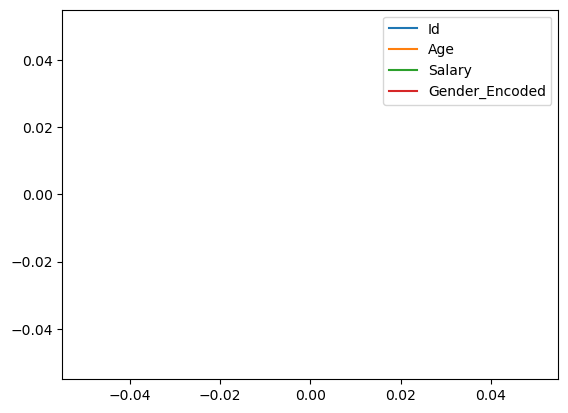

In [55]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df_cleaned[['Age', 'Salary']]))
outliers = (z_scores > 3).any(axis=1)
df_no_outliers=df_cleaned[outliers]
df_no_outliers.head().plot
df_no_outliers.head().plot()



